<a href="https://colab.research.google.com/github/kartik10sharma/cv_prj/blob/main/Welcome_To_Colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

smile data for p1 is used


In [2]:
import numpy as np
import cv2
import dlib
import matplotlib.pyplot as plt
import glob

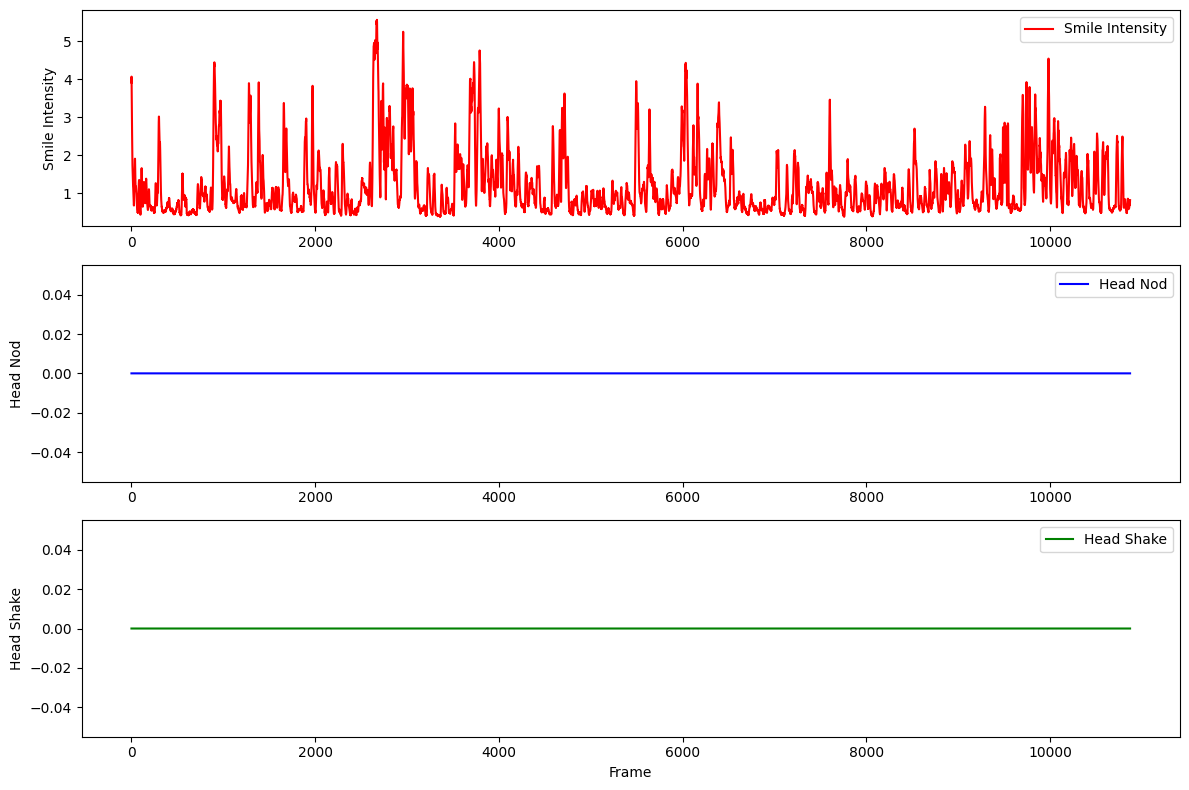

Detected 161 smile events above threshold.
Statistics saved to smile_stats.csv


In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# 1. Load the data (change file path and separator as needed)
file_path = '/content/sample_data/input_data/Smoothed-features-P86.txt'  # Use your actual filename
# Assuming the values are separated by spaces within each row of the first column
df = pd.read_csv(file_path, sep='\t', header=None)

# 2. Extract and process the smile intensity column
# Split the string in the first column by spaces and convert to numeric
all_features = df.iloc[:, 0].str.split(expand=True).astype(float)
smile_intensity = all_features.iloc[:, 1] # Assuming smile intensity is in the 13th column (index 12)


# 3. Extract head nod and head shake data (assuming they are in specific columns)

head_nod = all_features.iloc[:, 3]
head_shake = all_features.iloc[:, 4]


# 4. Plot smile intensity, head nod, and head shake
plt.figure(figsize=(12, 8))

plt.subplot(3, 1, 1)
plt.plot(smile_intensity, color='red', label='Smile Intensity')
plt.ylabel('Smile Intensity')
plt.legend()

plt.subplot(3, 1, 2)
plt.plot(head_nod, color='blue', label='Head Nod')
plt.ylabel('Head Nod')
plt.legend()

plt.subplot(3, 1, 3)
plt.plot(head_shake, color='green', label='Head Shake')
plt.xlabel('Frame')
plt.ylabel('Head Shake')
plt.legend()

plt.tight_layout()
plt.show()

# 5. (Optional) Detect smile events above a threshold
def detect_smile_events(smile_data, threshold=1.0, min_duration=2):
    events = []
    in_smile = False
    start = 0
    for i, val in enumerate(smile_data):
        if not in_smile and val > threshold:
            in_smile = True
            start = i
        elif in_smile and val <= threshold:
            in_smile = False
            if i - start >= min_duration:
                events.append((start, i-1))
    return events

events = detect_smile_events(smile_intensity)
print(f"Detected {len(events)} smile events above threshold.")

# 6. (Optional) Save statistics to CSV
stats = {
    'mean': [smile_intensity.mean()],
    'std': [smile_intensity.std()],
    'max': [smile_intensity.max()],
    'min': [smile_intensity.min()],
    'num_events': [len(events)]
}
stats_df = pd.DataFrame(stats)
stats_df.to_csv('smile_stats.csv', index=False)
print("Statistics saved to smile_stats.csv")

In [22]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

input_folder = '/content/sample_data/input_data'
output_folder = '/content/sample_data/output_data'
os.makedirs(output_folder, exist_ok=True)

def detect_smile_events(smile_data, threshold=1.0, min_duration=2):
    events = []
    in_smile = False
    start = 0
    for i, val in enumerate(smile_data):
        if not in_smile and val > threshold:
            in_smile = True
            start = i
        elif in_smile and val <= threshold:
            in_smile = False
            if i - start >= min_duration:
                events.append((start, i-1))
    return events

summary_stats = []

for filename in os.listdir(input_folder):
    if filename.endswith(".txt"):
        file_path = os.path.join(input_folder, filename)
        print(f"Processing {filename}...")

        try:
            # 1. Load the data
            df = pd.read_csv(file_path, sep='\t', header=None)

            # 2. Extract and process the smile intensity column
            all_features = df.iloc[:, 0].str.split(expand=True).astype(float)
            smile_intensity = all_features.iloc[:, 1]  # adjust index if needed

            # 3. Extract head nod and shake (adjust columns as needed)
            head_nod = all_features.iloc[:, 3]
            head_shake = all_features.iloc[:, 4]

            # 4. Plot smile intensity, head nod, and shake
            plt.figure(figsize=(12, 8))

            plt.subplot(3, 1, 1)
            plt.plot(smile_intensity, color='red', label='Smile Intensity')
            plt.ylabel('Smile Intensity')
            plt.legend()

            plt.subplot(3, 1, 2)
            plt.plot(head_nod, color='blue', label='Head Nod')
            plt.ylabel('Head Nod')
            plt.legend()

            plt.subplot(3, 1, 3)
            plt.plot(head_shake, color='green', label='Head Shake')
            plt.xlabel('Frame')
            plt.ylabel('Head Shake')
            plt.legend()

            plt.tight_layout()
            plot_path = os.path.join(output_folder, f"{filename}_plot.png")
            plt.savefig(plot_path)
            plt.close()

            # 5. Detect smile events
            events = detect_smile_events(smile_intensity)
            print(f"Detected {len(events)} smile events in {filename}.")

            # 6. Save statistics
            stats = {
                'filename': filename,
                'mean': smile_intensity.mean(),
                'std': smile_intensity.std(),
                'max': smile_intensity.max(),
                'min': smile_intensity.min(),
                'num_events': len(events)
            }
            summary_stats.append(stats)

            stats_df = pd.DataFrame([stats])
            stats_csv_path = os.path.join(output_folder, f"{filename}_stats.csv")
            stats_df.to_csv(stats_csv_path, index=False)

        except Exception as e:
            print(f"❌ Failed to process {filename}: {e}")

# Save all file stats in a master CSV
summary_path = os.path.join(output_folder, "smile_summary_all.csv")
pd.DataFrame(summary_stats).to_csv(summary_path, index=False)
print(f"\n✅ All stats saved to {summary_path}")





Processing Smoothed-features-P86.txt...
Detected 161 smile events in Smoothed-features-P86.txt.
Processing Smoothed-features-P71.txt...
Detected 54 smile events in Smoothed-features-P71.txt.
Processing Smoothed-features-P14.txt...
Detected 68 smile events in Smoothed-features-P14.txt.
Processing Smoothed-features-P61.txt...
Detected 12 smile events in Smoothed-features-P61.txt.
Processing Smoothed-features-P50.txt...
Detected 8 smile events in Smoothed-features-P50.txt.
Processing Smoothed-features-P34.txt...
Detected 153 smile events in Smoothed-features-P34.txt.
Processing Smoothed-features-P31.txt...
Detected 93 smile events in Smoothed-features-P31.txt.
Processing Smoothed-features-P77.txt...
Detected 64 smile events in Smoothed-features-P77.txt.
Processing Smoothed-features-P44.txt...
Detected 167 smile events in Smoothed-features-P44.txt.
Processing Smoothed-features-P69.txt...
Detected 107 smile events in Smoothed-features-P69.txt.
Processing Smoothed-features-P84.txt...
Detecte

Yawning


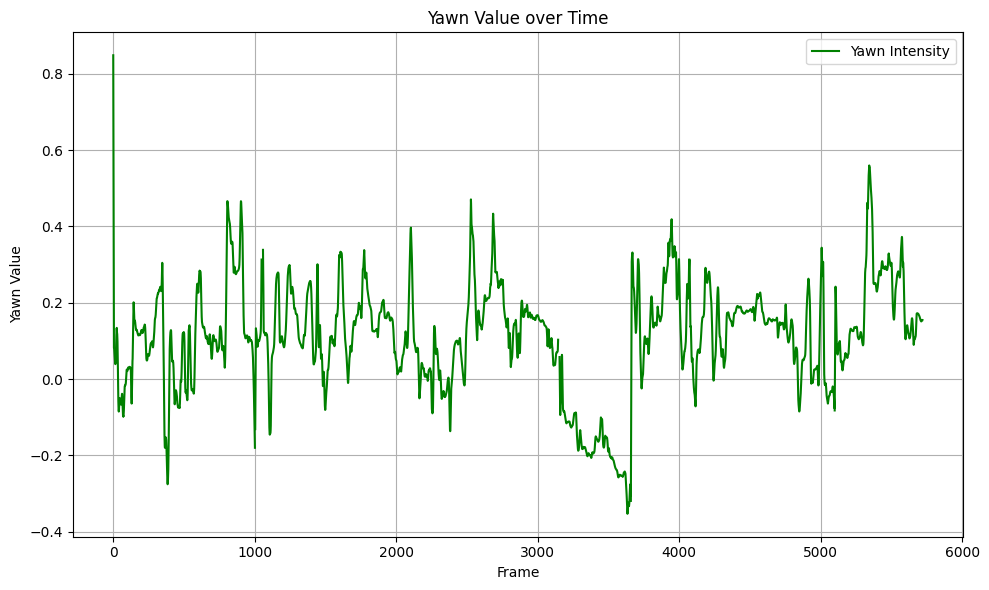

Detected 7 yawn events above threshold.
 yawn statistics saved to yawn_stats.csv


In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# 1. Load the data
file_path = '/content/sample_data/P1.csv'  # Update path if needed
df = pd.read_csv(file_path, sep=',', header=None)

# 2. Extract the yawn column
yawn = df.iloc[1:, 1].astype(float)

# 3. Plot the yawn values
plt.figure(figsize=(10, 6))
plt.plot(yawn, color='green', label='Yawn Intensity')
plt.xlabel('Frame')
plt.ylabel('Yawn Value')
plt.title('Yawn Value over Time')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# 4. Detect yawn events (threshold based)
def detect_yawn_events(yawn_series, threshold=0.4, min_duration=3):
    events = []
    in_yawn = False
    start = 0
    for i, val in enumerate(yawn_series):
        if not in_yawn and val > threshold:
            in_yawn = True
            start = i
        elif in_yawn and val <= threshold:
            in_yawn = False
            if i - start >= min_duration:
                events.append((start, i-1))
    return events

# 5. Detect and report yawn events
yawn_events = detect_yawn_events(yawn)
print(f"Detected {len(yawn_events)} yawn events above threshold.")

# 6. Save simple yawn stats
stats = {
    'mean_yawn': [yawn.mean()],
    'std_yawn': [yawn.std()],
    'max_yawn': [yawn.max()],
    'min_yawn': [yawn.min()],
    'num_yawn_events': [len(yawn_events)]
}
pd.DataFrame(stats).to_csv('yawn_stats.csv', index=False)
print(" yawn statistics saved to yawn_stats.csv")


Batch Process of yawning

In [8]:
import os
import pandas as pd
import matplotlib.pyplot as plt

# Folder containing multiple CSVs
data_dir = '/content/sample_data/input_data'  # Update this path as needed

# Create output folder for stats and plots
stats_dir = os.path.join(data_dir, 'yawn_stats_output')
os.makedirs(stats_dir, exist_ok=True)

# Function to detect yawn events (your logic preserved)
def detect_yawn_events(yawn_series, threshold=0.4, min_duration=3):
    events = []
    in_yawn = False
    start = 0
    for i, val in enumerate(yawn_series):
        if not in_yawn and val > threshold:
            in_yawn = True
            start = i
        elif in_yawn and val <= threshold:
            in_yawn = False
            if i - start >= min_duration:
                events.append((start, i-1))
    return events

# Loop through all CSV files in the directory
for filename in os.listdir(data_dir):
    if filename.endswith('.csv'):
        filepath = os.path.join(data_dir, filename)

        # Load and process the file
        df = pd.read_csv(filepath, sep=',', header=None)
        yawn = df.iloc[1:, 1].astype(float)

        # Plot the yawn values
        plt.figure(figsize=(10, 6))
        plt.plot(yawn, color='green', label='Yawn Intensity')
        plt.xlabel('Frame')
        plt.ylabel('Yawn Value')
        plt.title(f'Yawn Value over Time: {filename}')
        plt.legend()
        plt.grid(True)
        plt.tight_layout()
        plot_path = os.path.join(stats_dir, f'{filename}_plot.png')
        plt.savefig(plot_path)
        plt.close()

        # Detect yawn events
        yawn_events = detect_yawn_events(yawn)

        # Save statistics
        stats = {
            'mean_yawn': [yawn.mean()],
            'std_yawn': [yawn.std()],
            'max_yawn': [yawn.max()],
            'min_yawn': [yawn.min()],
            'num_yawn_events': [len(yawn_events)]
        }

        stats_df = pd.DataFrame(stats)
        stats_file = os.path.join(stats_dir, f'{filename}_yawn_stats.csv')
        stats_df.to_csv(stats_file, index=False)

        print(f"Processed: {filename} | Events: {len(yawn_events)}")


Processed: PP55.csv | Events: 2
Processed: PP45.csv | Events: 6
Processed: PP4.csv | Events: 5
Processed: P83.csv | Events: 20
Processed: PP56.csv | Events: 1
Processed: PP31.csv | Events: 54


<ipython-input-8-f6382fa12609>:33: DtypeWarning: Columns (0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath, sep=',', header=None)


Processed: PP81.csv | Events: 9


<ipython-input-8-f6382fa12609>:33: DtypeWarning: Columns (0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath, sep=',', header=None)


Processed: P64.csv | Events: 2
Processed: PP72.csv | Events: 4
Processed: PP64.csv | Events: 10
Processed: PP57.csv | Events: 25
Processed: P10.csv | Events: 3
Processed: P4.csv | Events: 7
Processed: P5.csv | Events: 12
Processed: P58.csv | Events: 2
Processed: PP78.csv | Events: 9
Processed: PP24.csv | Events: 1
Processed: PP5.csv | Events: 6
Processed: P27.csv | Events: 1
Processed: P79.csv | Events: 3
Processed: PP84.csv | Events: 11
Processed: PP30.csv | Events: 1
Processed: P59.csv | Events: 45
Processed: PP13.csv | Events: 1
Processed: P30.csv | Events: 1
Processed: PP17.csv | Events: 1
Processed: PP69.csv | Events: 11
Processed: P21.csv | Events: 3
Processed: PP58.csv | Events: 1
Processed: PP63.csv | Events: 1
Processed: P81.csv | Events: 2
Processed: P73.csv | Events: 1
Processed: P29.csv | Events: 18


<ipython-input-8-f6382fa12609>:33: DtypeWarning: Columns (0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath, sep=',', header=None)


Processed: P67.csv | Events: 2
Processed: PP61.csv | Events: 5
Processed: P8.csv | Events: 5
Processed: P76.csv | Events: 1
Processed: P55.csv | Events: 12
Processed: PP32.csv | Events: 12
Processed: PP29.csv | Events: 8
Processed: P25.csv | Events: 7
Processed: P61.csv | Events: 1
Processed: PP50.csv | Events: 22
Processed: PP1.csv | Events: 5
Processed: P17.csv | Events: 5
Processed: PP77.csv | Events: 5


<ipython-input-8-f6382fa12609>:33: DtypeWarning: Columns (0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath, sep=',', header=None)


Processed: PP89.csv | Events: 24


<ipython-input-8-f6382fa12609>:33: DtypeWarning: Columns (0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath, sep=',', header=None)


Processed: PP65.csv | Events: 1


<ipython-input-8-f6382fa12609>:33: DtypeWarning: Columns (0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath, sep=',', header=None)


Processed: PP3.csv | Events: 17
Processed: P70.csv | Events: 1
Processed: P71.csv | Events: 1


<ipython-input-8-f6382fa12609>:33: DtypeWarning: Columns (0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath, sep=',', header=None)


Processed: PP85.csv | Events: 17
Processed: PP70.csv | Events: 3


<ipython-input-8-f6382fa12609>:33: DtypeWarning: Columns (0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath, sep=',', header=None)


Processed: P49.csv | Events: 1
Processed: P52.csv | Events: 1
Processed: P6.csv | Events: 29
Processed: PP8.csv | Events: 5


<ipython-input-8-f6382fa12609>:33: DtypeWarning: Columns (0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath, sep=',', header=None)


Processed: PP86.csv | Events: 1
Processed: P34.csv | Events: 2
Processed: P89.csv | Events: 10
Processed: PP42.csv | Events: 2
Processed: PP60.csv | Events: 20
Processed: P11.csv | Events: 14
Processed: PP49.csv | Events: 10
Processed: PP47.csv | Events: 9
Processed: P50.csv | Events: 1
Processed: P42.csv | Events: 24
Processed: PP62.csv | Events: 2
Processed: PP14.csv | Events: 7
Processed: PP71.csv | Events: 4
Processed: P53.csv | Events: 2


<ipython-input-8-f6382fa12609>:33: DtypeWarning: Columns (0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath, sep=',', header=None)


Processed: PP79.csv | Events: 11
Processed: P86.csv | Events: 9


<ipython-input-8-f6382fa12609>:33: DtypeWarning: Columns (0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath, sep=',', header=None)


Processed: P65.csv | Events: 1
Processed: P32.csv | Events: 1
Processed: P80.csv | Events: 8
Processed: PP74.csv | Events: 2
Processed: P72.csv | Events: 1
Processed: P47.csv | Events: 5
Processed: PP34.csv | Events: 3
Processed: PP53.csv | Events: 0
Processed: PP22.csv | Events: 19
Processed: P16.csv | Events: 1
Processed: P1.csv | Events: 7
Processed: P45.csv | Events: 3
Processed: P78.csv | Events: 4
Processed: P22.csv | Events: 1
Processed: PP33.csv | Events: 7
Processed: PP11.csv | Events: 1
Processed: P60.csv | Events: 31
Processed: PP66.csv | Events: 20
Processed: P44.csv | Events: 23
Processed: PP73.csv | Events: 2
Processed: P43.csv | Events: 8
Processed: P12.csv | Events: 1
Processed: P35.csv | Events: 15
Processed: P37.csv | Events: 4
Processed: P66.csv | Events: 22
Processed: PP16.csv | Events: 11
Processed: P14.csv | Events: 1
Processed: PP12.csv | Events: 1
Processed: P74.csv | Events: 31
Processed: P84.csv | Events: 3
Processed: PP21.csv | Events: 1
Processed: P31.csv | 

<ipython-input-8-f6382fa12609>:33: DtypeWarning: Columns (0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath, sep=',', header=None)


Processed: PP67.csv | Events: 10
Processed: PP80.csv | Events: 3
Processed: PP20.csv | Events: 13
Processed: P77.csv | Events: 1
Processed: P20.csv | Events: 8
Processed: PP76.csv | Events: 1
Processed: PP25.csv | Events: 4
Processed: PP43.csv | Events: 3
Processed: PP37.csv | Events: 2
Processed: P48.csv | Events: 1
Processed: PP35.csv | Events: 1
Processed: P56.csv | Events: 4
Processed: P62.csv | Events: 4
Processed: PP7.csv | Events: 1
Processed: PP27.csv | Events: 1
Processed: PP59.csv | Events: 6
Processed: P33.csv | Events: 4
Processed: P69.csv | Events: 9
Processed: PP52.csv | Events: 5
Processed: P63.csv | Events: 1
Processed: PP83.csv | Events: 47
Processed: PP44.csv | Events: 8
